# Genotype-Phenotype Analysis for Zhu-Tokita-Takenouchi-Kim Syndrome (OMIM #617140)

## Overview

In this notebook, we will conduct a genotype-phenotype analysis for **Zhu-Tokita-Takenouchi-Kim Syndrome (OMIM #617140)**, a rare developmental disorder caused by pathogenic variants in the *SON* gene. This syndrome, also known as **ZTTK Syndrome**, is characterized by a range of symptoms including intellectual disability, developmental delays, and craniofacial abnormalities. The disease is associated mainly with protein-truncating variants of the *SON* gene, and it is inherited in an autosomal dominant manner.

## Goals of the Analysis

Using genotype and phenotype data, we will:
1. Load and annotate the clinical signs and symptoms of individuals diagnosed with ZTTK Syndrome using the **Human Phenotype Ontology (HPO)**.
2. Characterize and visualize the distribution of variants in the *SON* gene.
3. Explore the relationships between different types of *SON* variants, in this case the recurrent variant p.Val1918GlufsTer87 vs the rest of the cohort, and their associated phenotypic manifestations.
4. Perform a statistical analysis to identify HPO terms that are significantly associated with specific variant types.

## Data Sources

- **Phenotypic data**: Patients’ phenotypes will be described using HPO terms.
- **Genotypic data**: Variants will be annotated from the relevant transcript (`NM_138927.4`) and protein (`NP_620305.2`) sequences of the *SON* gene.

## Structure of the Notebook

1. **Loading the Human Phenotype Ontology (HPO)**: We will begin by loading the latest release of the HPO, which will allow us to accurately describe the phenotypic data of the patients.
2. **Loading and Preprocessing Patient Data**: We will load the patient cohort associated with ZTTK Syndrome, preprocess the phenotypic and genotypic data, and validate the dataset.
3. **Exploratory Data Analysis (EDA)**: We will summarize and visualize the most frequent phenotypic features and gene variants in the cohort.
4. **Genotype-Phenotype Correlation Analysis**: We will perform hypothesis testing to investigate potential associations between the *SON* recurring variant and specific phenotypic traits.
5. **Reporting and Visualization**: We will generate visual reports of the results, highlighting key findings in variant-phenotype correlations.

By the end of this analysis, we aim to provide deeper insights into how different pathogenic variants in the *SON* gene contribute to the clinical presentation of Zhu-Tokita-Takenouchi-Kim Syndrome.

So, lets get started with the first thing!

### Loading the Human Phenotype Ontology (HPO) and Defining the Analysis Parameters

In this cell, we perform two key tasks:

1. **Loading the HPO**:
   - We use the `hpotk` library to load the **Human Phenotype Ontology (HPO)**, a standardized vocabulary for describing phenotypic abnormalities in human disease. This ontology is essential for genotype-phenotype association analysis.
   - Specifically, we configure the ontology store and load a minimal version of the HPO from the release dated **July 2024** (`v2024-07-01`).

2. **Setting Up the Analysis Parameters**:
   - We define the cohort name as `'SON'`, referring to the group of individuals with **Zhu-Tokita-Takenouchi-Kim Syndrome**, which is caused by pathogenic variants in the *SON* gene.
   - The **transcript ID** (`tx_id`) is set to `'NM_138927.4'`, which refers to the specific transcript of the *SON* gene that will be used for the analysis.
   - The **protein ID** (`px_id`) is set to `'NP_620305.2'`, representing the corresponding protein encoded by the *SON* gene.

This sets the stage for analyzing the relationship between pathogenic variants in the *SON* gene and the associated phenotypic abnormalities in patients with Zhu-Tokita-Takenouchi-Kim Syndrome.

In [1]:
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-07-01')

cohort_name = 'SON'
tx_id = 'NM_138927.4'
px_id = 'NP_620305.2'

## Loading and Preprocessing the Patient Data

In this section, we load the patient data associated with Zhu-Tokita-Takenouchi-Kim Syndrome (ZTTK Syndrome) from the phenopacket store. Each patient has been encoded into a **phenopacket**, which contains detailed clinical information, including phenotypic features described using Human Phenotype Ontology (HPO) terms.

### Steps:

1. **Configure and Open the Phenopacket Store**:
   We initialize a connection to the phenopacket store using version `0.1.18` of the dataset. The phenopacket store holds a collection of phenotypic and genotypic data for individuals affected by the syndrome.

2. **Load the Cohort**:
   We load the phenopackets for each patient in the cohort related to *SON* variants. The number of phenopackets loaded is then displayed.

3. **Create a Cohort Object**:
   Using the phenopackets, we create a **cohort** object, which groups all the individual patients together for further analysis. We also include preprocessing steps such as functional annotation of the variants and phenotypic data integration.

4. **Validation**:
   Once the cohort is created, a validation check is performed to ensure the data is consistent and free of any errors. The validation summary will display any potential warnings or errors that need to be addressed before proceeding with the analysis.


In [2]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.18') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))
len(phenopackets)

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 52/52 [00:49<00:00,  1.05individuals/s]
Validated under permissive policy
No errors or warnings were found


In this section, we will generate two key outputs to better understand the cohort data and the impact of variants in the *SON* gene associated with ZTTK Syndrome.

### Generating a Cohort Summary
We use the **CohortViewable** class from the GPSEA toolkit to process the cohort data and generate a summary report. This summary provides an overview of key aspects of the cohort, such as:
- The most frequent **HPO terms** used to describe phenotypic features.
- The most common **variants** and their associated effects.
- The overall distribution of **diseases** and **variant effects** in the cohort.

The report is saved as an HTML file (`son_cohort_info.html`) for review.

### Visualizing the Protein and Variant Distribution
Next, we create a visual representation of how the identified variants in the cohort are distributed across the protein encoded by the *SON* gene.

- **Transcript and Protein Metadata**:
  - We use the *GRCh38* genome build to fetch the coordinates of the **transcript** (`NM_138927.4`) and retrieve detailed information about the **protein** (`NP_620305.2`) it encodes.

- **Protein Diagram**:
  - We utilize the **ProteinVisualizer** class to plot a diagram that illustrates the locations of the variants in relation to important regions of the protein. This gives insight into how mutations might impact protein structure and function.

- The diagram is saved as `son_protein_diagram.png` and also displayed within the notebook.

This visualization helps highlight any clustering of mutations in specific protein domains, which could be functionally significant in the context of ZTTK Syndrome.


In [4]:
from gpsea.view import CohortViewable
viewer = CohortViewable(hpo)
report = viewer.process(cohort=cohort, transcript_id=tx_id)
report

HPO Term,ID,Seen in n individuals
Hypotonia,HP:0001252,31
Feeding difficulties,HP:0011968,30
Delayed speech and language development,HP:0000750,27
Short stature,HP:0004322,26
Ventriculomegaly,HP:0002119,24
Downslanted palpebral fissures,HP:0000494,24
Seizure,HP:0001250,24
Low-set ears,HP:0000369,22
"Intellectual disability, severe",HP:0010864,22
Strabismus,HP:0000486,21


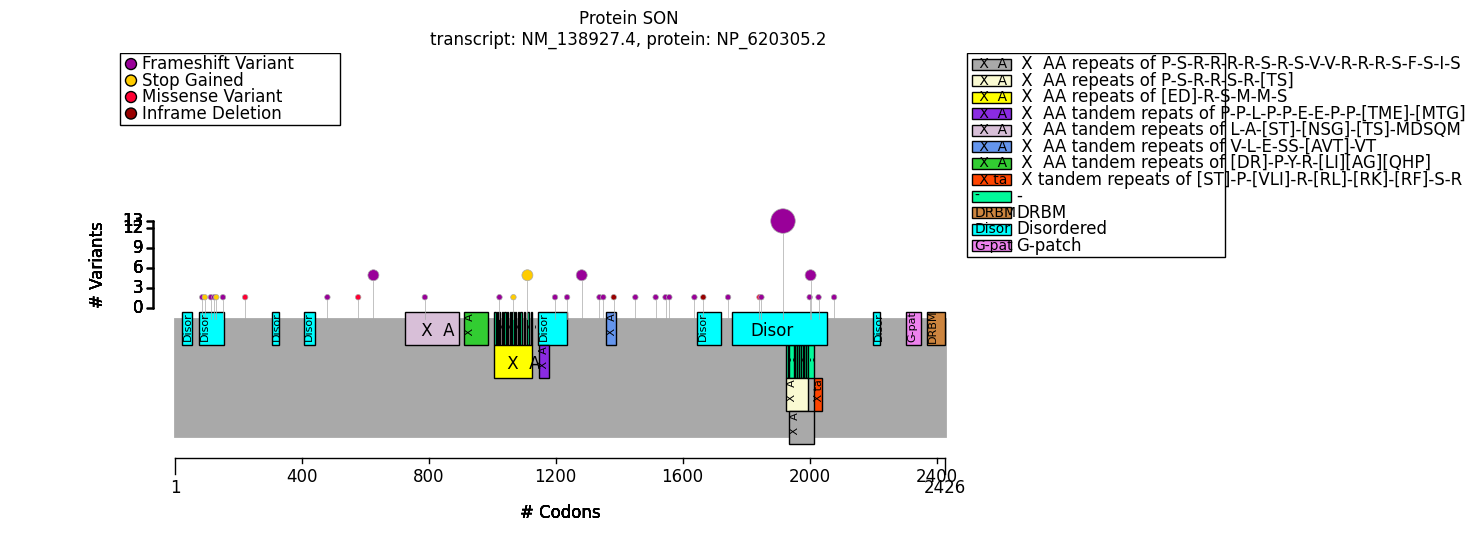

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(tx_id)
protein_meta = pms.annotate(px_id)

from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()
fig.savefig('son_protein_diagram.png')
plt.show()

Next, we will generate a detailed report that summarizes all variant alleles present in the cohort of individuals with pathogenic variants in the *SON* gene associated with ZTTK Syndrome.

### Generating the Variants Report
We utilize the **CohortVariantViewer** class from the GPSEA toolkit to process the cohort data and create a comprehensive report on the variants. This report includes:

- **Variant Key**: A unique identifier for each variant allele.
- **Predicted Effects**: The expected impact of each variant on the transcript (cDNA) and the corresponding protein.
- **Variant Effects**: Functional consequences that the variants may have on protein function and associated phenotypes.
- **Patient Count**: The number of individuals within the cohort who present with each variant allele.

The generated report is saved as an HTML file (`son_all_variants.html`), which can be reviewed to gain insights into the distribution and potential functional implications of the variants identified in the cohort. This information is crucial for understanding the genotype-phenotype relationships in ZTTK Syndrome and for guiding further research or clinical decisions.

In [6]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(tx_id=tx_id)
report = viewer.process(cohort=cohort)
report

Variant key,Variant (cDNA),Variant (protein),Effects,Count
21_33554981_33554985_CAGTT_C,c.5753_5756del,p.Val1918GlufsTer87,frameshift,13
21_33551111_33551113_CAG_C,c.1881_1882del,p.Val629AlafsTer56,frameshift,2
SO:1000029_HGNC:11183_SON,SV involving SON,p.?,chromosomal deletion,2
21_33553078_33553083_TGTATG_T,c.3852_3856del,p.Met1284IlefsTer2,frameshift,2
21_33555240_33555241_TG_T,c.6010del,p.Val2004TrpfsTer2,frameshift,2
21_33552565_33552565_C_T,c.3334C>T,p.Arg1112Ter,stop gained,2
21_33550674_33550675_GC_G,c.1444del,p.Leu482CysfsTer4,frameshift,1
21_33554144_33554149_AACATG_A,c.4919_4923del,p.Asp1640GlyfsTer7,frameshift,1
21_33549575_33549579_AAAAC_A,c.348_351del,p.Asn116LysfsTer32,frameshift,1
21_33553778_33553778_A_AG,c.4549dup,p.Glu1517GlyfsTer6,frameshift,1


We use the `list_all_variants()` method of the `cohort` object to obtain a complete inventory of the variants associated with the *SON* gene, to also know how these are annotated. Since we're interested in the recurring variant that is present 13 times in the cohort, we need to fetch the exact key_of_interest.

In [5]:
cohort.list_all_variants()

[('21_33554981_33554985_CAGTT_C', 13),
 ('21_33553078_33553083_TGTATG_T', 2),
 ('21_33551111_33551113_CAG_C', 2),
 ('21_33555240_33555241_TG_T', 2),
 ('21_33552565_33552565_C_T', 2),
 ('SO:1000029_HGNC:11183_SON', 2),
 ('21_33554759_33554759_C_A', 1),
 ('21_33552303_33552303_G_GA', 1),
 ('21_33554144_33554149_AACATG_A', 1),
 ('21_33554460_33554461_AC_A', 1),
 ('21_33553778_33553778_A_AG', 1),
 ('21_33550674_33550675_GC_G', 1),
 ('21_33552827_33552827_T_TGC', 1),
 ('21_33555232_33555232_T_TCC', 1),
 ('21_33553282_33553283_GC_G', 1),
 ('21_33549575_33549579_AAAAC_A', 1),
 ('21_33555317_33555318_GC_G', 1),
 ('21_33557226_33557227_AC_A', 1),
 ('21_33552939_33552940_TC_T', 1),
 ('21_33554228_33554243_TTGATTTACCATCTAA_T', 1),
 ('21_33551595_33551596_TA_T', 1),
 ('21_33553870_33553871_CA_C', 1),
 ('21_33549687_33549688_TG_T', 1),
 ('21_33553247_33553248_TG_T', 1),
 ('21_33554776_33554778_AAG_A', 1),
 ('21_33549625_33549625_C_T', 1),
 ('21_33549517_33549517_C_T', 1),
 ('21_33549607_33549608_GA

In [7]:
variant_key_of_interest = '21_33554981_33554985_CAGTT_C'
variant = cohort.get_variant_by_key(variant_key_of_interest)
print(variant)

Variant(variant_info=VariantInfo(variant_coordinates=VariantCoordinates(region=GenomicRegion(contig=21, start=33554980, end=33554985, strand=+), ref=CAGTT, alt=C, change_length=-4), sv_info=None), tx_annotations=(TranscriptAnnotation(gene_id:SON,transcript_id:NM_001291411.2,hgvs_cdna:NM_001291411.2:c.5753_5756del,is_preferred:False,variant_effects:(<VariantEffect.FRAMESHIFT_VARIANT: 'SO:0001589'>,),overlapping_exons:(3,),protein_id:NP_001278340.2,hgvsp:NP_001278340.2:p.Val1918GlufsTer87,protein_effect_location:Region(start=1916, end=1918)), TranscriptAnnotation(gene_id:SON,transcript_id:NM_001291412.3,hgvs_cdna:NM_001291412.3:c.245-2172_245-2169del,is_preferred:False,variant_effects:(<VariantEffect.INTRON_VARIANT: 'SO:0001627'>,),overlapping_exons:None,protein_id:NP_001278341.1,hgvsp:None,protein_effect_location:None), TranscriptAnnotation(gene_id:SON,transcript_id:NM_032195.3,hgvs_cdna:NM_032195.3:c.5753_5756del,is_preferred:False,variant_effects:(<VariantEffect.FRAMESHIFT_VARIANT: 'S

Now, we will use the `monoallelic_predicate` function to create a predicate that distinguishes between individuals with the specific recurrent variant (p.Val1918GlufsTer87) of interest and those without it. This allows us to investigate potential differences in phenotype based on the presence of this variant. 

- **`a_predicate`**: This defines the condition where the variant of interest is present.
- **`b_predicate`**: This captures the opposite condition, where the variant is absent. The tilde (`~`) is used to negate the predicate.
- **`names`**: This parameter labels the two groups being compared. In this case, the first group is labeled with the `variant_key_of_interest`, and the second group is labeled as 'Others'.

In [8]:
from gpsea.model import VariantEffect

from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
gt_predicate = monoallelic_predicate(
    a_predicate=VariantPredicates.variant_key(variant_key_of_interest),
    b_predicate=~VariantPredicates.variant_key(variant_key_of_interest),
    names=(variant_key_of_interest, 'Others')
)
gt_predicate.display_question()

'Allele group: 21_33554981_33554985_CAGTT_C, Others'

Now, do the actual analysis and save the results.

In [10]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
    min_n_of_patients_with_term=2,
)

from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05

from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.pcats import HpoTermAnalysis
analysis = HpoTermAnalysis(
    count_statistic=FisherExactTest(),
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)

result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
result.total_tests

len(result.phenotypes)

from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_report = mtc_viewer.process(result)
mtc_report

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,11
HMF04,Skipping term because all genotypes have same HPO observed proportions,48
HMF05,Skipping term because one genotype had zero observations,5
HMF06,Skipping term with less than 7 observations (not powered for 2x2),17
HMF08,Skipping general term,52


In [11]:
from gpsea.view import summarize_hpo_analysis
summary_df = summarize_hpo_analysis(hpo, result)
summary_df

Allele group                                   21_33554981_33554985_CAGTT_C  \
                                                                      Count   
Posteriorly rotated ears [HP:0000358]                                  4/12   
Strabismus [HP:0000486]                                                2/11   
Pes planus [HP:0001763]                                                5/13   
Hypoplasia of the corpus callosum [HP:0002079]                         0/11   
Ventriculomegaly [HP:0002119]                                          4/11   
Caesarian section [HP:0011410]                                         3/13   
Generalized joint hypermobility [HP:0002761]                           3/13   
Low-set ears [HP:0000369]                                              5/12   
Seizure [HP:0001250]                                                   5/13   
Hypermetropia [HP:0000540]                                             2/13   
Horizontal eyebrow [HP:0011228]                                        4/11   
Sleep abnormality [HP:0002360]                                         4/13   
Midface retrusion [HP:0011800]                                         4/11   
Premature birth [HP:0001622]                                           4/13   
Hypotonia [HP:0001252]                                                 7/13   
Intellectual disability, moderate [HP:0002342]                          1/1   
Intellectual disability [HP:0001249]                                  12/12   
Facial asymmetry [HP:0000324]                                          3/11   
Downslanted palpebral fissures [HP:0000494]                            6/11   
Deeply set eye [HP:0000490]                                            3/11   
Epicanthus [HP:0000286]                                                2/11   
Intellectual disability, severe [HP:0010864]                            7/7   
EEG abnormality [HP:0002353]                                           3/13   
Feeding difficulties [HP:0011968]                                      8/12   
Intellectual disability, mild [HP:0001256]                              3/3   

Allele group                                           Others          \
                                               Percent  Count Percent   
Posteriorly rotated ears [HP:0000358]              33%   2/31      6%   
Strabismus [HP:0000486]                            18%  19/36     53%   
Pes planus [HP:0001763]                            38%   6/38     16%   
Hypoplasia of the corpus callosum [HP:0002079]      0%   7/33     21%   
Ventriculomegaly [HP:0002119]                      36%  20/33     61%   
Caesarian section [HP:0011410]                     23%   5/39     13%   
Generalized joint hypermobility [HP:0002761]       23%  14/38     37%   
Low-set ears [HP:0000369]                          42%  17/31     55%   
Seizure [HP:0001250]                               38%  19/38     50%   
Hypermetropia [HP:0000540]                         15%   9/36     25%   
Horizontal eyebrow [HP:0011228]                    36%  10/36     28%   
Sleep abnormality [HP:0002360]                     31%   8/35     23%   
Midface retrusion [HP:0011800]                     36%  11/36     31%   
Premature birth [HP:0001622]                       31%  10/39     26%   
Hypotonia [HP:0001252]                             54%  24/38     63%   
Intellectual disability, moderate [HP:0002342]    100%  11/12     92%   
Intellectual disability [HP:0001249]              100%  37/38     97%   
Facial asymmetry [HP:0000324]                      27%  11/36     31%   
Downslanted palpebral fissures [HP:0000494]        55%  18/36     50%   
Deeply set eye [HP:0000490]                        27%   9/36     25%   
Epicanthus [HP:0000286]                            18%   9/36     25%   
Intellectual disability, severe [HP:0010864]      100%  15/16     94%   
EEG abnormality [HP:0002353]                       23%   8/38     21%   
Feeding difficulties [HP:0011968]        

Also print the results, and see if there are any symptoms with a corrected p value lower than 0.05 (so survive multiple testing)!